In [1]:
from silence_tensorflow import silence_tensorflow
import warnings
warnings.filterwarnings(action='ignore')
silence_tensorflow()

In [2]:
import os
import model
from mgf_loader_v2 import import_mgf
os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
#Load model
model = model.create_AE()
model.load_weights('/home/kimkami2/dropbox/동국대학교/연구/MS_flavonoid/flavnoid_final_NEWDATA_weighted.keras')
name = {0:'3-O-glycoside', 1:'6-C-glycoside', 2:'7-O-glycoside', 
        3:'8-C-glycoside', 4:"4'-O-glycoside"}

In [4]:
#Load testset
import numpy as np
X = np.load("Vit_flavonoid_testset_input.npy")
y_true = np.load("Vit_flavonoid_testset_truth.npy")
print("Number of Test set: ",len(X))

Number of Test set:  1745


In [9]:
#Accuracy
y_pred = model.predict(X)
wrong = []
for i in range(len(X)):
    if not (y_pred[i].round() == y_true[i]).all():
        wrong.append(i)
print('Accuracy:',round(1-len(wrong)/len(y_pred),3))

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Accuracy: 0.847


In [10]:
#Precision, Recall, and F1-Score
from sklearn.metrics import precision_recall_fscore_support as prf
for j in range(5):
    pre, rec, f1, n = prf(y_true[:,j],y_pred.round()[:,j])
    print(name[j], f"n={n[1]}", "Precision: ", pre[1].round(3), "Recall: ", rec[1].round(3), "F1-score: ", f1[1].round(3))

3-O-glycoside n=782 Precision:  0.941 Recall:  0.904 F1-score:  0.922
6-C-glycoside n=121 Precision:  0.893 Recall:  0.893 F1-score:  0.893
7-O-glycoside n=909 Precision:  0.946 Recall:  0.856 F1-score:  0.899
8-C-glycoside n=120 Precision:  0.6 Recall:  0.9 F1-score:  0.72
4'-O-glycoside n=93 Precision:  0.71 Recall:  0.817 F1-score:  0.76


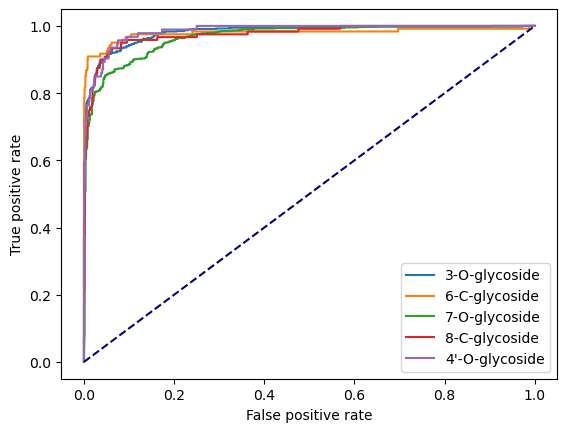

In [11]:
#Drawing ROC curve
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

for j in [0,1,2,3,4]:
    precision, recall, _ = roc_curve(y_true[:,j], y_pred[:,j])
    auc_score = auc(recall, precision)
# plot precision-recall curves
    plt.plot(precision, recall,  label=name[j])
# axis labels
plt.plot([0, 1], [0, 1], color="navy",  linestyle="--")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
# show the legend
plt.legend()
# show the plot
plt.show()

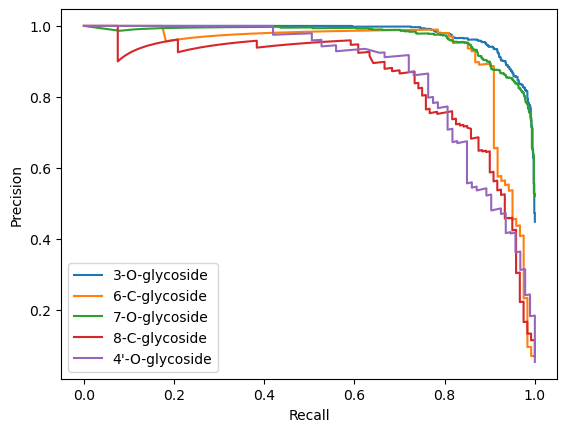

In [12]:
#Drawing PR curve
for j in [0,1,2,3,4]:
    precision, recall, _ = precision_recall_curve(y_true[:,j], y_pred[:,j])
    auc_score = auc(recall, precision)
# plot precision-recall curves
    plt.plot(recall, precision,  label=name[j
             ])
# axis labels
    
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [13]:
#Load spectra of flavonoid standards
inputs = import_mgf('flavonoid_standard.mgf')
result = model.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<BarContainer object of 500 artists>

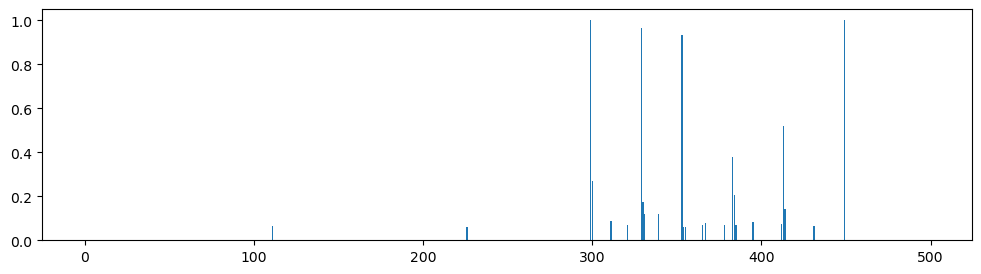

In [14]:
#MS/MS spectrum of isoorientin
plt.figure(figsize=(12,3))
plt.bar(range(500),inputs[0][0][:500].reshape(500,))

In [15]:
# Prediction results of flavonoid standards
for i in range(len(result)):
    for j in np.where(result[i]>=0.5)[0]:
        print(i+1, name[j])

1 8-C-glycoside
2 3-O-glycoside
3 8-C-glycoside
4 6-C-glycoside
5 6-C-glycoside
6 3-O-glycoside
7 3-O-glycoside
8 3-O-glycoside
9 3-O-glycoside
10 4'-O-glycoside
11 3-O-glycoside
12 4'-O-glycoside
13 3-O-glycoside
14 3-O-glycoside
16 7-O-glycoside
17 7-O-glycoside
19 7-O-glycoside
20 7-O-glycoside
22 3-O-glycoside
22 7-O-glycoside
23 3-O-glycoside
23 7-O-glycoside
24 3-O-glycoside
24 7-O-glycoside
25 3-O-glycoside


In [16]:
#Load flavonoid peaks from Citrus unshiu
inputs = import_mgf('citrus_extract.mgf')
result = model.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<BarContainer object of 500 artists>

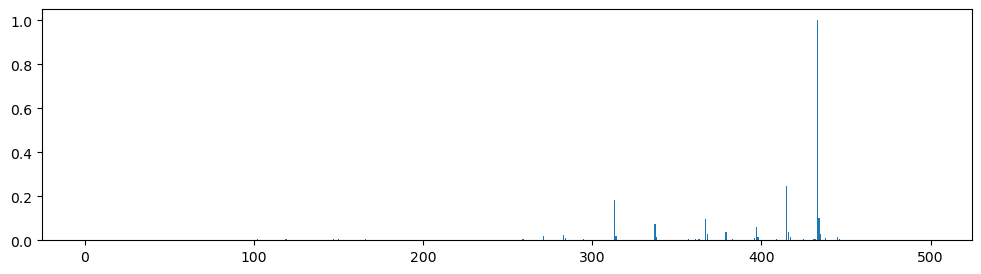

In [17]:
#MS/MS spectrum of Peak C (Isovitexin 2''-O-arabinoside)
plt.figure(figsize=(12,3))
plt.bar(range(500),inputs[2][0][:500].reshape(500,))

In [18]:
# Prediction results from C. unshiu
peak_name = ['Peak_A','Peak_B','Peak_C', 'Peak_D', 'Peak_E','Peak_F','Peak_G','Peak_H','Peak_I','Peak_J']
for i in range(len(result)):
    for j in np.where(result[i]>=0.5)[0]:
        print(peak_name[i], name[j])

Peak_A 6-C-glycoside
Peak_A 8-C-glycoside
Peak_B 7-O-glycoside
Peak_C 6-C-glycoside
Peak_D 7-O-glycoside
Peak_E 6-C-glycoside
Peak_F 7-O-glycoside
Peak_G 7-O-glycoside
Peak_H 7-O-glycoside
Peak_I 7-O-glycoside
Peak_J 7-O-glycoside
